In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("information.csv",encoding = "ISO-8859-1", engine='python')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [4]:
df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [6]:
df = df.drop(columns = ['_unit_id','_last_judgment_at','created','profileimage','tweet_created', 'tweet_id', 'tweet_location', 'user_timezone','name'],axis=1)

In [7]:
df['gender'].value_counts()


female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   gender                 19953 non-null  object 
 4   gender:confidence      20024 non-null  float64
 5   profile_yn             20050 non-null  object 
 6   profile_yn:confidence  20050 non-null  float64
 7   description            16306 non-null  object 
 8   fav_number             20050 non-null  int64  
 9   gender_gold            50 non-null     object 
 10  link_color             20050 non-null  object 
 11  profile_yn_gold        50 non-null     object 
 12  retweet_count          20050 non-null  int64  
 13  sidebar_color          20050 non-null  object 
 14  text                   20050 non-null  object 
 15  tw

In [9]:
df.columns

Index(['_golden', '_unit_state', '_trusted_judgments', 'gender',
       'gender:confidence', 'profile_yn', 'profile_yn:confidence',
       'description', 'fav_number', 'gender_gold', 'link_color',
       'profile_yn_gold', 'retweet_count', 'sidebar_color', 'text',
       'tweet_coord', 'tweet_count'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
df['_golden'] = le.fit_transform(df['_golden'])
df.head(2)

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,profile_yn_gold,retweet_count,sidebar_color,text,tweet_coord,tweet_count
0,0,finalized,3,male,1.0,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964
1,0,finalized,3,male,1.0,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471


In [12]:
df['profile_yn'].value_counts()

yes    19953
no        97
Name: profile_yn, dtype: int64

In [13]:
df = df.drop(['tweet_coord'],axis=1)

In [14]:
df['retweet_count'].value_counts()

0      19431
1        499
2         56
3         17
6          8
5          7
4          6
7          5
8          3
11         3
10         2
12         2
20         2
19         1
49         1
330        1
36         1
153        1
13         1
23         1
9          1
15         1
Name: retweet_count, dtype: int64

In [15]:
drop_index = df[df['gender'] == 'unknown'].index
df = df.drop(index=drop_index,axis=1)

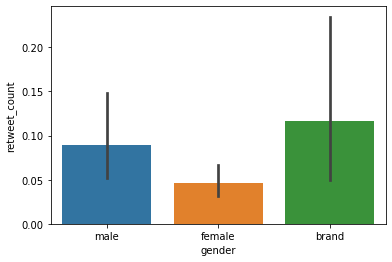

In [16]:
sns.barplot(x='gender',y='retweet_count',data=df)

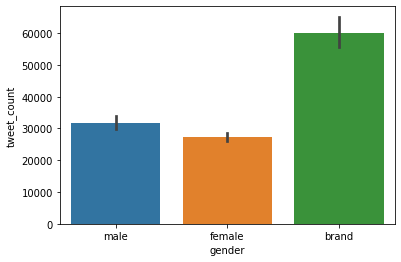

In [17]:
sns.barplot(x='gender',y='tweet_count',data=df)

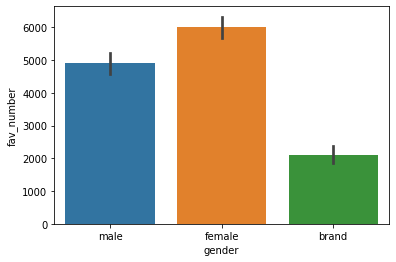

In [18]:
sns.barplot(x='gender',y='fav_number',data=df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18933 entries, 0 to 20049
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                18933 non-null  int64  
 1   _unit_state            18933 non-null  object 
 2   _trusted_judgments     18933 non-null  int64  
 3   gender                 18836 non-null  object 
 4   gender:confidence      18907 non-null  float64
 5   profile_yn             18933 non-null  object 
 6   profile_yn:confidence  18933 non-null  float64
 7   description            15604 non-null  object 
 8   fav_number             18933 non-null  int64  
 9   gender_gold            50 non-null     object 
 10  link_color             18933 non-null  object 
 11  profile_yn_gold        50 non-null     object 
 12  retweet_count          18933 non-null  int64  
 13  sidebar_color          18933 non-null  object 
 14  text                   18933 non-null  object 
 15  tw

In [20]:
df['profile_yn_gold'].unique()
#df[''].unique()

array([nan, 'yes'], dtype=object)

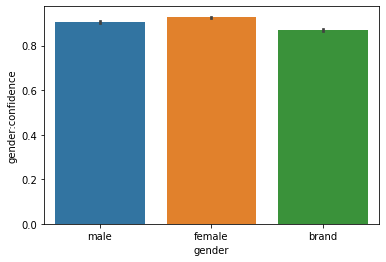

In [21]:
sns.barplot(x='gender',y='gender:confidence',data=df)

In [22]:
df = df[df['gender:confidence']==1]

In [23]:
df = df.drop(columns = ['gender:confidence'],axis=1)
df.head()

,_golden,_unit_state,_trusted_judgments,gender,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,profile_yn_gold,retweet_count,sidebar_color,text,tweet_count
0,0,finalized,3,male,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,0,finalized,3,male,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
3,0,finalized,3,male,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,NaN,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,0,finalized,3,female,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,NaN,0,0,Watching Neighbours on Sky+ catching up with t...,31462
5,0,finalized,3,female,yes,1.0,you don't know me.,3901,NaN,F5ABB5,NaN,0,0,"Ive seen people on the train with lamps, chair...",20036


In [24]:
df = df.drop(columns=['link_color','sidebar_color'],axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                13804 non-null  int64  
 1   _unit_state            13804 non-null  object 
 2   _trusted_judgments     13804 non-null  int64  
 3   gender                 13804 non-null  object 
 4   profile_yn             13804 non-null  object 
 5   profile_yn:confidence  13804 non-null  float64
 6   description            11773 non-null  object 
 7   fav_number             13804 non-null  int64  
 8   gender_gold            29 non-null     object 
 9   profile_yn_gold        29 non-null     object 
 10  retweet_count          13804 non-null  int64  
 11  text                   13804 non-null  object 
 12  tweet_count            13804 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.5+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C096A208C8>,
      dtype=object)

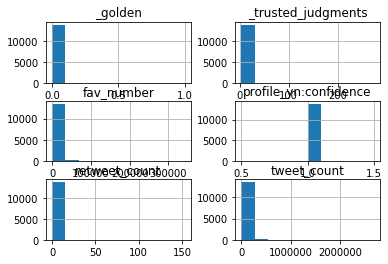

In [26]:
df.hist()

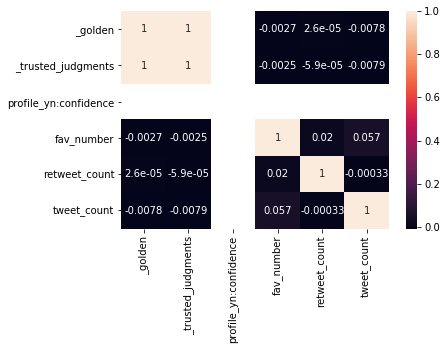

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
df = df.drop(columns=['gender_gold','profile_yn_gold'],axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                13804 non-null  int64  
 1   _unit_state            13804 non-null  object 
 2   _trusted_judgments     13804 non-null  int64  
 3   gender                 13804 non-null  object 
 4   profile_yn             13804 non-null  object 
 5   profile_yn:confidence  13804 non-null  float64
 6   description            11773 non-null  object 
 7   fav_number             13804 non-null  int64  
 8   retweet_count          13804 non-null  int64  
 9   text                   13804 non-null  object 
 10  tweet_count            13804 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.3+ MB


In [30]:
df['profile_yn'].value_counts()

yes    13804
Name: profile_yn, dtype: int64

In [31]:
drop1 = df[df['profile_yn'] == 'no'].index
df = df.drop(index=drop1,axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                13804 non-null  int64  
 1   _unit_state            13804 non-null  object 
 2   _trusted_judgments     13804 non-null  int64  
 3   gender                 13804 non-null  object 
 4   profile_yn             13804 non-null  object 
 5   profile_yn:confidence  13804 non-null  float64
 6   description            11773 non-null  object 
 7   fav_number             13804 non-null  int64  
 8   retweet_count          13804 non-null  int64  
 9   text                   13804 non-null  object 
 10  tweet_count            13804 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.3+ MB


In [33]:
df['gender'].isna().sum()

0

In [34]:
df['description'].isna().sum()

2031

In [35]:
d1 = df[df['description'].isna()].index

df = df.drop(index=d1,axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11773 entries, 0 to 20049
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                11773 non-null  int64  
 1   _unit_state            11773 non-null  object 
 2   _trusted_judgments     11773 non-null  int64  
 3   gender                 11773 non-null  object 
 4   profile_yn             11773 non-null  object 
 5   profile_yn:confidence  11773 non-null  float64
 6   description            11773 non-null  object 
 7   fav_number             11773 non-null  int64  
 8   retweet_count          11773 non-null  int64  
 9   text                   11773 non-null  object 
 10  tweet_count            11773 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.1+ MB


In [37]:
df['gender'] = le.fit_transform(df['gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11773 entries, 0 to 20049
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                11773 non-null  int64  
 1   _unit_state            11773 non-null  object 
 2   _trusted_judgments     11773 non-null  int64  
 3   gender                 11773 non-null  int32  
 4   profile_yn             11773 non-null  object 
 5   profile_yn:confidence  11773 non-null  float64
 6   description            11773 non-null  object 
 7   fav_number             11773 non-null  int64  
 8   retweet_count          11773 non-null  int64  
 9   text                   11773 non-null  object 
 10  tweet_count            11773 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 1.0+ MB


In [38]:
df.head(2)

,_golden,_unit_state,_trusted_judgments,gender,profile_yn,profile_yn:confidence,description,fav_number,retweet_count,text,tweet_count
0,0,finalized,3,2,yes,1.0,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964
1,0,finalized,3,2,yes,1.0,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471


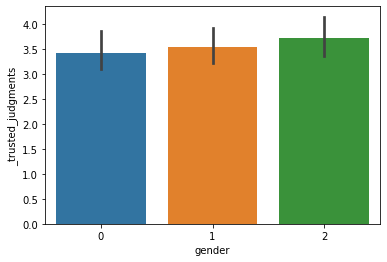

In [39]:
df['_trusted_judgments'].unique()
sns.barplot(x='gender',y='_trusted_judgments',data=df)

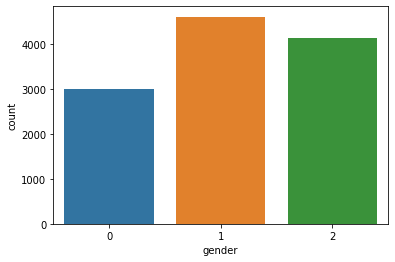

In [110]:
sns.countplot(df['gender'])

In [40]:
df = df.drop(columns=['_trusted_judgments'],axis=1)
df.head(2)

,_golden,_unit_state,gender,profile_yn,profile_yn:confidence,description,fav_number,retweet_count,text,tweet_count
0,0,finalized,2,yes,1.0,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964
1,0,finalized,2,yes,1.0,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471


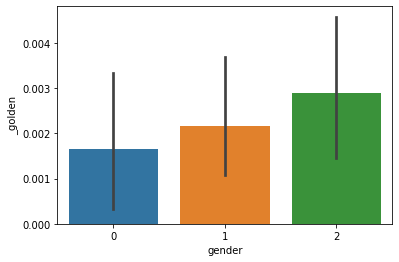

In [41]:
sns.barplot(x='gender',y='_golden',data=df)

In [42]:
df = df.drop(columns=['_unit_state','profile_yn','profile_yn:confidence'],axis=1)
df.head()

,_golden,gender,description,fav_number,retweet_count,text,tweet_count
0,0,2,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964
1,0,2,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471
3,0,2,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693
4,0,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462
5,0,1,you don't know me.,3901,0,"Ive seen people on the train with lamps, chair...",20036


In [43]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [136]:
def cleaner(text):
    text = str(text)
    text.lower()
    
    text = re.sub('\s\W',' ',text)
    text = re.sub('\W,\s',' ',text)
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub("\d+", "", text)
    text = re.sub('\s+',' ',text)
    text = re.sub('[!@#$_]', '', text)
    text = text.replace("co","")
    text = text.replace("https","")
    text = text.replace(",","")
    text = text.replace("[\w*"," ")
    
    #text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #text = re.sub(r'\<a href', ' ', text)
    #text = re.sub(r'&amp;', '', text) 
    #text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    #text = re.sub(r'<br />', ' ', text)
    #text = re.sub(r'\'', ' ', text)
    
    text = text.split()
    #stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    #clean=[]
    
    text =  nltk.WordPunctTokenizer().tokenize(text)
    
    #clean = [word for word in text if not word in stop]
    #text = " ".join(text)
    
    #clean = [PorterStemmer().stem(word) for word in text]
    
    #clean = [WordNetLemmatizer().lemmatize(word) for word in text]
    
    
    return text

In [54]:
stops = set(stopwords.words('english'))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [137]:
df['tweets'] = [cleaner(text) for text in df['text']]
df.head(2)

,_golden,gender,description,fav_number,retweet_count,text,tweet_count,tweets,clean_description,normalized tweets,normalized_description
0,0,2,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,"[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]","[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]"
1,0,2,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,"[ÛÏIt, felt, like, friends, I, living, story, ...","[I, author, novels, filled, family, drama, rom...","[\, x89, ÛÏIt, felt, like, friends, I, living,...","[I, author, novels, filled, family, drama, rom..."


In [138]:
df['clean_description'] = [cleaner(text) for text in df['description']]
df.head(2)

,_golden,gender,description,fav_number,retweet_count,text,tweet_count,tweets,clean_description,normalized tweets,normalized_description
0,0,2,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,"[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]","[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]"
1,0,2,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,"[ÛÏIt, felt, like, friends, I, living, story, ...","[I, author, novels, filled, family, drama, rom...","[\, x89, ÛÏIt, felt, like, friends, I, living,...","[I, author, novels, filled, family, drama, rom..."


In [139]:
def normalize(text):
    clean = []
    clean = [PorterStemmer().stem(word) for word in text]
    
    clean = [WordNetLemmatizer().lemmatize(word) for word in text]
    return clean

In [140]:
df['text'] = [clean_text(text) for text in df['text']]
df['description'] = [clean_text(text) for text in df['description']]
df.head(2)

,_golden,gender,description,fav_number,retweet_count,text,tweet_count,tweets,clean_description,normalized tweets,normalized_description
0,0,2,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,"[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]","[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]"
1,0,2,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,"[ÛÏIt, felt, like, friends, I, living, story, ...","[I, author, novels, filled, family, drama, rom...","[\, x89, ÛÏIt, felt, like, friends, I, living,...","[I, author, novels, filled, family, drama, rom..."


In [141]:
df['normalized tweets'] = [cleaner(text) for text in df['tweets']]
df.head(2)

,_golden,gender,description,fav_number,retweet_count,text,tweet_count,tweets,clean_description,normalized tweets,normalized_description
0,0,2,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,"[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]","[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]"
1,0,2,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,"[ÛÏIt, felt, like, friends, I, living, story, ...","[I, author, novels, filled, family, drama, rom...","[ÛÏIt, felt, like, friends, I, living, story, ...","[I, author, novels, filled, family, drama, rom..."


In [142]:
df['normalized_description'] = [cleaner(text) for text in df['clean_description']]
df.head(2)

,_golden,gender,description,fav_number,retweet_count,text,tweet_count,tweets,clean_description,normalized tweets,normalized_description
0,0,2,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,"[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]","[Robbie, E, Responds, To, Critics, After, Win,...","[sing, rhythm]"
1,0,2,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,"[ÛÏIt, felt, like, friends, I, living, story, ...","[I, author, novels, filled, family, drama, rom...","[ÛÏIt, felt, like, friends, I, living, story, ...","[I, author, novels, filled, family, drama, rom..."


In [143]:
Male = df[df['gender'] == 2]
Female = df[df['gender'] == 1]

Male_Words = pd.Series(' '.join(Male['normalized tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['normalized tweets'].astype(str)).lower().split(" ")).value_counts()[:20]

Male_Words

'i',         1159
'the',        316
['i',         280
'ù',          257
'like',       233
'get',        214
['the',       200
'û',          156
'and',        155
'one',        154
'time',       144
'new',        137
'go',         125
'love',       119
'people',     115
'got',        110
'know',       107
'think',      106
'amp',        105
'see',        105
dtype: int64

In [144]:
Female_Words

'i',         1749
'ù',          782
['i',         535
'like',       282
'the',        272
'get',        253
'and',        218
'one',        208
'day',        194
'love',       191
'go',         174
'ù']          167
['the',       157
'û',          155
'time',       151
'people',     149
'âù',         143
'amp',        139
'got',        136
'know',       134
dtype: int64

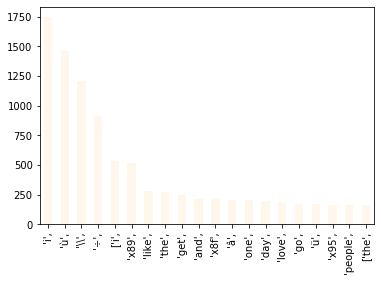

In [130]:
Female_Words.plot(kind='bar',stacked=True, colormap='OrRd')


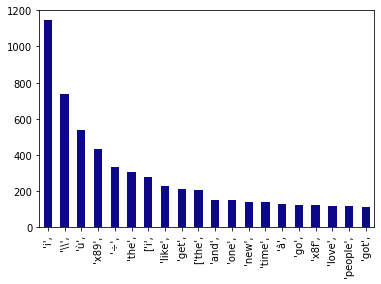

In [133]:
Male_Words.plot(kind='bar',stacked=True, colormap='plasma')

In [60]:
X = df[['fav_number','tweet_count','retweet_count','_golden']].values
Y = df[['gender']].values

In [61]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=2)

In [62]:
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((8829, 4), (2944, 4), (8829, 1), (2944, 1))

In [103]:
def clean_text(s):
    s=str(s)
    s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W\s',' ',s)
    return s

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline

In [64]:
lr = LogisticRegression(random_state=1)
lr.fit(train_X,train_Y)

C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
from sklearn.metrics import accuracy_score,mean_absolute_error

In [66]:
predicted = lr.predict(test_X)
accuracy_score(test_Y,predicted)

0.5

In [67]:
mean_absolute_error(test_Y,predicted)

0.6222826086956522

In [68]:
vct = CountVectorizer()
vct

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [113]:
tfidf = TfidfVectorizer(lowercase=False)
x_tdf = df['clean_description']+df['normalized tweets']
Y = df['gender']
#x_train,x_test,y_train,y_test = train_test_split(x_tdf,Y_text,random_state=3)

#clf = Pipeline([('vect', vct),('clf', LogisticRegression( random_state=0))])

#clf.fit(x_train, y_train)

In [79]:
X =  x_tdf.apply(lambda x:" ".join(x))
X

0        sing rhythm Robbie E Responds To Critics After...
1        I author novels filled family drama romance \ ...
3        Mobile guy 49ers Shazam Google Kleiner Perkins...
4        Ricky Wilson The Best FRONTMAN Kaiser Chiefs T...
5          know Ive seen people train lamps chairs tvs etc
                               ...                        
20044    I Love Me Myself I Need A Ride Home From Pract...
20045             rp lookupondeath Fine I drink tea I love
20046    Whatever like problem 9 1 15 ChargerNation For...
20047    TeamBarcelona You look lost follow follow hear...
20049    Teamwork makes dream work I think APUSH creati...
Length: 11773, dtype: object

In [89]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=3)

clf = Pipeline([('vect', vct),('clf', LogisticRegression( random_state=0))])

In [90]:
clf.fit(x_train, y_train)

C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                          

In [91]:
accuracy_score(y_test,clf.predict(x_test))

0.6579483695652174

In [92]:
result = {}
for i in range(50,300,50):
    clf = Pipeline([('vect', vct),('clf', RandomForestClassifier(n_estimators=i, random_state=110))])

    clf.fit(x_train, y_train)
    result[i] = accuracy_score(y_test,clf.predict(x_test))


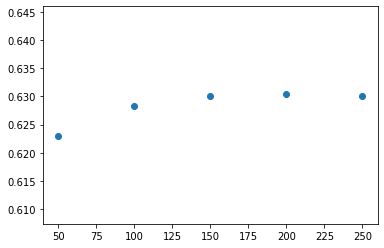

In [93]:
plt.scatter(result.keys(),result.values())


In [94]:
clf = Pipeline([('vect', vct),('clf', RandomForestClassifier(n_estimators=200, random_state=10))])

clf.fit(x_train, y_train)
accuracy_score(y_test,clf.predict(x_test))

0.6328125

In [95]:
clf = Pipeline([('vect', vct),('clf', SVC(kernel='linear'))])

clf.fit(x_train, y_train)
accuracy_score(y_test,clf.predict(x_test))

0.6423233695652174

In [96]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([('vect',vct),('nv',MultinomialNB())])

clf.fit(x_train, y_train)
accuracy_score(y_test,clf.predict(x_test))

0.6803668478260869

In [97]:
from sklearn.ensemble import VotingClassifier

In [98]:
lr = LogisticRegression(random_state=2)
svc = SVC(kernel = 'linear',random_state=2)
nv =MultinomialNB()

In [105]:
x_without_normalise = df['description']+df['text']
X_train,X_test,Y_train,Y_test = train_test_split(x_without_normalise,Y,random_state=3)

In [106]:
ensemble = VotingClassifier(estimators = [('lr',lr),('svc',svc),('nv',nv)],voting='hard')
clf = Pipeline([('vect',vct),('ensemble',ensemble)])
clf.fit(X_train, Y_train)
accuracy_score(Y_test,clf.predict(x_test))

C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6100543478260869

In [107]:
ensemble = VotingClassifier(estimators = [('lr',lr),('svc',svc),('nv',nv)],voting='hard')
clf = Pipeline([('vect',vct),('ensemble',ensemble)])
clf.fit(x_train, y_train)
accuracy_score(y_test,clf.predict(x_test))

C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6582880434782609

In [109]:
round(accuracy_score(y_test,clf.predict(x_test)),2)

0.66

In [3]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'